## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [13]:
from sklearn.linear_model import LinearRegression
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

/Users/junjiexie/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/junjiexie/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# %matplotlib widget

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=60)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [5]:
lr = LinearRegression().fit(X_train,y_train)

In [6]:
print("training score is {:.2f}".format(lr.score(X_train,y_train)))
print("testing score is {:.2f}".format(lr.score(X_test,y_test))) #测试集就当做全新的数据

training score is 0.68
testing score is 0.57


In [7]:
y_predict = lr.predict(X_test)

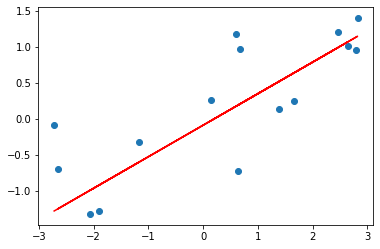

In [8]:
#针对新数据的可视化分析
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X_test,y_test)
ax.plot(X_test,y_predict,color="red")

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [20]:
def model(X, y):
    # 直接存储 X,y 即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [21]:
from scipy.spatial.distance import cosine
import numpy as np

In [22]:
def distance(x1, x2):
    #这里以余弦距离作为距离衡量标准
    return cosine(x1, x2)

In [46]:
def KNN_regression(x, k=5):
    # 在predicate的时候，需要做大量的计算
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
#     print(most_similars)
    
    return np.mean(y_hats)
    # -> regression: numerical -> most_similars (y)
    # -> classification: categorical -> most_similar (y)
    
    # 已经获得了最相似的数据集
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了 

In [47]:
knn_y_predict = [[KNN_regression(xi)] for xi in X_test]

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
print('线性回归的MSE为：',mean_squared_error(y_test,y_predict))
print('knn回归的MSE为：',mean_squared_error(y_test,knn_y_predict))

线性回归的MSE为： 0.3320399734592601
knn回归的MSE为： 0.4212055464657437


#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [4]:
mock_data = {
    'gender':['F', 'M', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [11]:
import pandas as pd
from collections import Counter
from icecream import ic
import numpy as np
dataset = pd.DataFrame.from_dict(mock_data)

In [6]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,M,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [7]:
def entropy(elements):
    '''群体的混乱程度，信息熵'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
#     ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [13]:
"""找到最佳的特征划分决策树，但仅限于一级，没有进一步延伸，加一个递归条件就可以改造成依次拓展每一层决策条件了
(划分次数呈2^n增长），有时间再做"""
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
#             ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
#             ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
#             ic(sub_split_2)
            
            entropy_2 = entropy(sub_spliter_2)
#             ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
#             ic(entropy_v)
            
            if entropy_v < min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [17]:
def persistent_spliter_choice(training_data: pd.DataFrame, target: str, count=0, spilter_list=None):
     
    if count == 0:
        spilter_list = {}
        
        a_spiliter_choice = find_the_optimal_spilter(training_data = training_data, target = target)
        count = count + 1
        spilter_list["第"+str(count)+"次特征选择"] = a_spiliter_choice

    else:
        #因为已经找到了最佳的分割点，有一方无法继续分割，向另外一方继续分割
#         print(spilter_list["第"+str(count-1)+"次特征选择"][0])
#         print(spilter_list["第"+str(count-1)+"次特征选择"][1])

        a_spiliter_choice = find_the_optimal_spilter(training_data = training_data, target = target)
    
        #设置递归终止条件
        if a_spiliter_choice == None:
            return spilter_list
        
        count = count + 1
        spilter_list["第"+str(count)+"次特征选择"] = a_spiliter_choice
        


    key = spilter_list["第"+str(count)+"次特征选择"][0]
    value = spilter_list["第"+str(count)+"次特征选择"][1]
    new_training_data = training_data[training_data[key] != value]
    print(new_training_data)
            
    return persistent_spliter_choice(training_data = new_training_data,target=target,count = count,spilter_list=spilter_list)

In [18]:
all_spliter_choice = persistent_spliter_choice(training_data=dataset, target='bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| f: 'family_number'
ic| values: {1, 2}
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| f: 'income'
ic| values: {'+10'}
ic| f: 'family_number'
ic| values: {1, 2}
ic| f: 'gender'
ic| values: {'F'}
ic| f: 'income'
ic| values: {'+10'}
ic| f: 'family_number'
ic| values: {2}
ic| f: 'gender'
ic| values: set()
ic| f: 'income'
ic| values: set()
ic| f: 'family_number'
ic| values: set()


spliter is: ('income', '-10')
the min entropy is: 0.6730116670092565
  gender income  family_number  bought
0      F    +10              1       1
2      F    +10              2       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0
spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083
  gender income  family_number  bought
2      F    +10              2       1
spliter is: ('gender', 'F')
the min entropy is: 0.0
Empty DataFrame
Columns: [gender, income, family_number, bought]
Index: []
spliter is: None
the min entropy is: inf


In [19]:
all_spliter_choice

{'第1次特征选择': ('income', '-10'),
 '第2次特征选择': ('family_number', 1),
 '第3次特征选择': ('gender', 'F')}

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [107]:
from sklearn.cluster import KMeans
import numpy as np

In [108]:
X1 = [np.random.randint(0, 100) for _ in range(100)]
X2 = [np.random.randint(0, 100) for _ in range(100)]

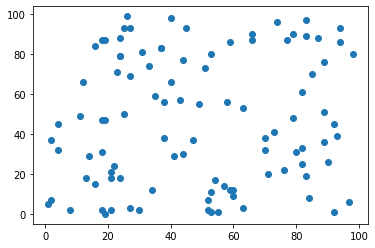

In [109]:
plt.scatter(X1, X2)

In [110]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [111]:
cluster = KMeans(n_clusters=6, max_iter=500)
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
from collections import defaultdict
centers = defaultdict(list)

In [113]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

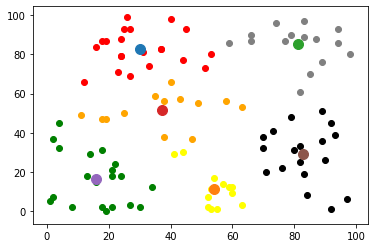

In [114]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

每个model都建立在一定的假设之上，所以所有的model均不能适用于所有的情况之下(现实）。只有在假设被满足时，也就是特定的情况下，模型能够可以对该特定情况的前因后果及其映射途径进行大致有用的描述或者拟合.

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

欠拟合：欠拟合是指模型拟合程度不高，数据距离拟合曲线较远，或指模型没有很好地捕捉到数据特征，不能够很好地拟合数据。在训练集表现差，在测试集表现同样会很差，二者均体现高偏差特征。

原因：“欠拟合”常常在模型学习能力(复杂度)较弱，而数据复杂度较高的情况出现，此时模型由于学习能力不足，无法学习到数据集中的“一般规律”，因而导致泛化能力弱。

过拟合：模型将训练集单个样本的数据特征都捕捉到，并将其认为是“一般规律”，导致模型泛化能力不足。在训练集中表现很好，但在测试集中表现很差，二者体现高方差特征。

原因：”过拟合“常常在模型拟合能力过强或者训练数据过少的情况中出现。

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

+ Accuracy: 预测的标签中预测正确的值的个数/总的预测的个数
+ Precision: 所有预测为对且正确的预测个数/所有为对的预测个数
+ Recall: 所有预测为对且正确的预测个数/所有真正为对的标签个数

F Score  = $ \frac{(1+β^2)*precision*recall}{β^2*precision + recall} $

当β=1时，即为F1 Score，这时召回率和精确率都很重要，权重相同。

当β>1时，即为F2 Score，此时我们认为认为召回率更加重要，优先保证召回率

Precision和Recall往往是互相矛盾的指标，若”宁可错杀一千，也不放过一个“，则优先保证Recall指标，否则保证Precision指标。

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

机器学习是数据驱动的，研究人员构建好ML算法，通过加载不同的数据，就能训练出一个个具体的ML应用模型以适应不同的应用场景，给应用模型新的数据输入，应用模型就能预测出新的结果。

分析式编程，工程师需要根据不同的应用场景，设计具体的模型和输入参数，若具体模型运行无误，将产生预期的结果

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

我认为这句话是正确的，唯有确定模型的评价标准，机器学习才能够适用于不同的场景并落地而仅仅停留在研究论证阶段。例如在癌症CT照片的应用中，模型的应用标准就应该优先保证召回率，因为多检测的代价是可以接受的，但漏掉一个有癌症的病人代价是非常高昂的。唯有结合现实场景才设计模型的评价标准，机器学习模型才能更好地服务人们而不是造成灾难。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [ ]:
all_spliter_choice = persistent_spliter_choice(training_data=dataset, target='bought')

In [42]:
all_spliter_choice

{'第1次特征选择': ('income', '-10'),
 '第2次特征选择': ('family_number', 1),
 '第3次特征选择': ('gender', 'F')}

In [20]:
for count,value in enumerate(all_spliter_choice.values()):
    print(count,value)

0 ('income', '-10')
1 ('family_number', 1)
2 ('gender', 'F')


In [127]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [45]:
#发现有一个bug，当找不到最佳划分点时（比如两个特征划分增益熵相同，原代码时把遍历最后一个相同的增益熵当做最佳划分点），时间所限没去找相应情况处理方法。
def forest_predicate(gender,income,family_nubmer):
    for count,value in enumerate(all_spliter_choice.values()):
        #income
        if count == 0 and value[1] == income:
            return 1
        else:
            pass
        #family_nubmer
        if count == 1 and value[1] == family_nubmer:
            return 1
        else:
            pass
        #gender
        if count == 2 and value[1] == gender:
            return 1
        else:
            return 0 

In [47]:
result = forest_predicate(gender = "F",income = +10,family_nubmer = +2)
print(result)

0


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [4]:
from sklearn.datasets import load_boston
import random

In [5]:
dataset = load_boston()
x,y=dataset['data'],dataset['target']

In [6]:
X_rm = x[:,5]

In [7]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [8]:
def loss_L1(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [15]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_hat_i <= y_i:
            gradient += (y_i-x_i)
        else:
            gradient += (x_i-y_i) 
    return -1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_hat_i <= y_i:
            gradient = (y_i-1)
        else:
            gradient = (1-y_i)
    return -1/n * gradient

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)

In [19]:
#initialized parameters,L2 loss

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 0.01

iteration_num = 1000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss_L1(y, price_use_current_parameters)
    losses.append(current_loss)
    if i%200 == 0:
        print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 262.1529053565604, parameters k is 29.951931572648164 and b is 96.44877255159903
Iteration 200, the loss is 57.88218218188966, parameters k is -2.544412300869501 and b is 96.40568954764566
Iteration 400, the loss is 12.360031718466868, parameters k is -11.36395257754933 and b is 96.3626065436923
Iteration 600, the loss is 12.356615272125094, parameters k is -11.357259889802272 and b is 96.31952353973892
Iteration 800, the loss is 12.353198825783318, parameters k is -11.350567202055213 and b is 96.27644053578555


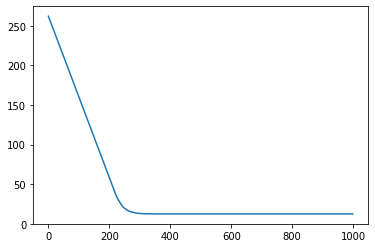

In [20]:
plt.plot(list(range(iteration_num)),losses)